##### Returns
**Return**

$$ R_{t,t+1} = \frac{P_{t+1}-P_{t}}{P_{t}} $$

or alternatively

$$ R_{t, t+1} = \frac{P_{t+1}}{P_{t}} - 1 $$


##### Total Return and Price Return
- Total return take consieration of Divident as well (배당금), while Price Return does not, i.e. only take price change into the consideration.
- Therefore, Total return is likely to be higher than price return

##### Multi-Priod Return
- e.g., if the stock price increasss on the first day by 10% and decrease by 5% on the second day, the return can be computed by:

$$ 1.1 \times 0.95 - 1 = 0.045 = 4.5\%

##### Annualizing Returns
- The Annualized return is the return you would get if the return that you are looking at had condinued for a year.
- e.g., the return over the month is `1%`. Then the annualized return can be calculated as follow:

$$ (1.01)^{12} -1 = 12.68\%

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
prices_a = np.array([8.70, 8.91, 8.71])

# prices_a[1:]
# prices_a[:-1]

prices_a[1:] / prices_a[:-1] - 1

array([ 0.02413793, -0.02244669])

In [40]:
prices = pd.DataFrame({"BLUE": [8.70, 8.91, 8.71, 8.43, 8.73],
                       "ORANGE": [10.66, 11.08, 10.71, 11.59, 12.11]})

prices

,BLUE,ORANGE
0,8.70,10.66
1,8.91,11.08
2,8.71,10.71
3,8.43,11.59
4,8.73,12.11


In [14]:
prices.iloc[1:]

,BLUE,ORANGE
1,8.91,11.08
2,8.71,10.71
3,8.43,11.59
4,8.73,12.11


In [15]:
prices.iloc[:-1]

,BLUE,ORANGE
0,8.70,10.66
1,8.91,11.08
2,8.71,10.71
3,8.43,11.59


In [17]:
prices.iloc[1:]/prices.iloc[:-1] -1
# this is not workin

,BLUE,ORANGE
0,NaN,NaN
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,NaN,NaN


In [18]:
prices.iloc[1:].values/prices.iloc[:-1] -1

,BLUE,ORANGE
0,0.024138,0.039400
1,-0.022447,-0.033394
2,-0.032147,0.082166
3,0.035587,0.044866


In [22]:
'''
# shift() function: realigns the indices
# since we want to get the row at index 0 to line up with the row at index 1, we can divide the 2nd row (at index 1),
# by the first row (at index 0), we want to shift the rows in the denominator by 1, which we do with the shift() function.
'''
prices.shift(1)

,BLUE,ORANGE
0,NaN,NaN
1,8.70,10.66
2,8.91,11.08
3,8.71,10.71
4,8.43,11.59


In [21]:
returns = prices/prices.shift(1) -1
returns

,BLUE,ORANGE
0,NaN,NaN
1,0.024138,0.039400
2,-0.022447,-0.033394
3,-0.032147,0.082166
4,0.035587,0.044866


In [50]:
# or we can use built-in function pct_change() on the dataFrame
returns = prices.pct_change()
returns

,BLUE,ORANGE
0,NaN,NaN
1,0.024138,0.039400
2,-0.022447,-0.033394
3,-0.032147,0.082166
4,0.035587,0.044866


In [52]:
prices = pd.read_csv("data/sample_prices.csv")
prices

,BLUE,ORANGE
0,8.7000,10.6600
1,8.9055,11.0828
2,8.7113,10.7100
3,8.4346,11.5907
4,8.7254,12.1070
5,9.0551,11.7876
6,8.9514,11.2078
7,9.2439,12.5192
8,9.1276,13.3624
9,9.3976,14.4080


In [54]:
returns = prices.pct_change()
returns

,BLUE,ORANGE
0,NaN,NaN
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249


In [34]:
returns.describe()

,BLUE,ORANGE
count,12.000000,12.000000
mean,0.010000,0.010000
std,0.023977,0.079601
min,-0.031763,-0.168261
25%,-0.011734,-0.037525
50%,0.016655,0.031852
75%,0.030355,0.070077
max,0.037786,0.117008


<Axes: >

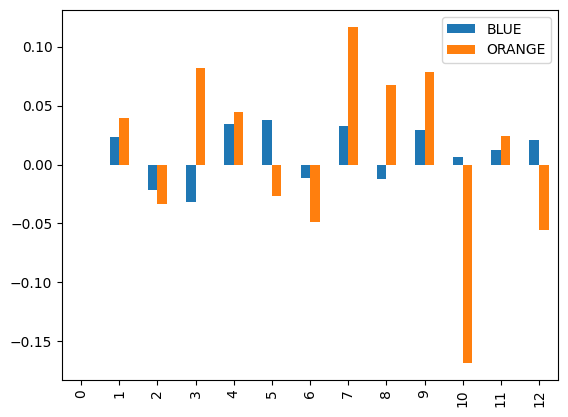

In [43]:
'''
Blue and Orange stock have the same mean returns, while how they bahave is certainly different.
'''
returns.plot.bar()

<Axes: >

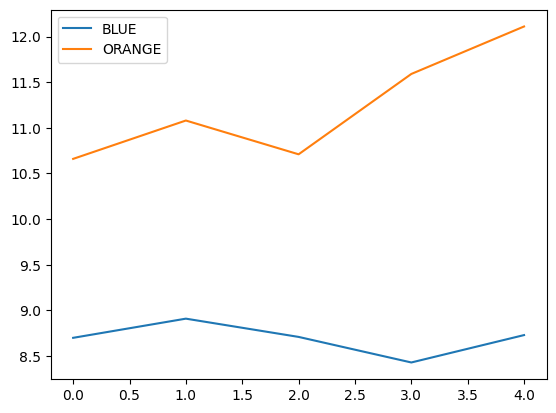

In [42]:
prices.plot()

##### Compounding Returns
Now that we have a series of 12 months returns, we can produce the compounded return by multiplying the individual returns, as long as the returns are expressed as growth rates in the format of "1+r" format.

In [55]:
returns + 1

,BLUE,ORANGE
0,NaN,NaN
1,1.023621,1.039662
2,0.978193,0.966362
3,0.968237,1.082232
4,1.034477,1.044544
5,1.037786,0.973619
6,0.988548,0.950813
7,1.032676,1.117008
8,0.987419,1.067353
9,1.029581,1.078249


In [57]:
np.prod(returns + 1)

BLUE      1.123310
ORANGE    1.087167
dtype: float64

In [58]:
(returns+1).prod()

BLUE      1.123310
ORANGE    1.087167
dtype: float64

In [59]:
(returns+1).prod() -1

BLUE      0.123310
ORANGE    0.087167
dtype: float64

In [60]:
(((returns+1).prod() -1)*100)

BLUE      12.331034
ORANGE     8.716698
dtype: float64

##### Annualizing Returns
To annualize a return for a period, we compound the return for as many times as there are periods in a year. For instance, to annualize a monthly return, we compound that return 12 times. The formula to annualize a monthly return $R_m$ is:

$$ (1+R_m)^{12} - 1 $$

To annualize a quarterly return $R_q$, we would get:

$$ (1+ R_q)^{4} - 1 $$

To annualize a daily return $R_d$, we would get:

$$ (1+ R_d)^{252} - 1 $$

In [61]:
rm = 0.01
(1 + rm) ** 12 - 1

0.12682503013196977

In [62]:
rq = 0.04
(1 + rq) ** 4 - 1

0.1698585600000002